### <span style="font-family: Arial; font-weight:bold;font-size:.9em;color:#0e92ea"> ReCell - Problem Statement

#### Description
Used and refurbished phone market has grown considerably over the past decade.Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones.
The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.

#### Objective


1. To come up with a ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones.

2. Analyze the data and build a linear regression model to predict the price of a used phone and identify factors that can significantly influence it.  




In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm


<IPython.core.display.Javascript object>

### <span style="font-family: Arial; font-weight:bold;font-size:.9em;color:#0e92ea"> Data Dictionary
* brand_name: Name of manufacturing brand
* os: OS on which the phone runs
* screen_size: Size of the screen in cm
* 4g: Whether 4G is available or not
* 5g: Whether 5G is available or not
* main_camera_mp: Resolution of the rear camera in megapixels
* selfie_camera_mp: Resolution of the front camera in megapixels
* int_memory: Amount of internal memory (ROM) in GB
* ram: Amount of RAM in GB
* battery: Energy capacity of the phone battery in mAh
* weight: Weight of the phone in grams
* release_year: Year when the phone model was released
* days_used: Number of days the used/refurbished phone has been used
* new_price: Price of a new phone of the same model in euros
* used_price: Price of the used/refurbished phone in euros


## Explore the dataset and extract insights using Exploratory Data Analysis.

1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis


In [42]:
##Read the used phone data
df = pd.read_csv("used_phone_data.csv")

<IPython.core.display.Javascript object>

In [43]:
# checking the shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 3571 rows and 15 columns.


<IPython.core.display.Javascript object>

In [44]:
# let's view a sample of the data
df.sample(n=10, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
2501,Samsung,Android,13.49,yes,no,13.0,13.0,32.0,4.00,3600.0,181.0,2017,683,198.680,79.47
2782,Sony,Android,13.81,yes,no,NaN,8.0,32.0,4.00,3300.0,156.0,2019,195,198.150,149.10
605,Others,Android,12.70,yes,no,8.0,5.0,16.0,4.00,2400.0,137.0,2015,1048,161.470,48.39
2923,Vivo,Android,19.37,yes,no,13.0,16.0,64.0,4.00,3260.0,149.3,2019,375,211.880,138.31
941,Others,Others,5.72,no,no,0.3,0.3,32.0,0.25,820.0,90.0,2013,883,29.810,8.92
1833,LG,Android,13.49,no,no,8.0,1.3,32.0,4.00,3140.0,161.0,2013,670,240.540,96.18
671,Apple,iOS,14.92,yes,no,12.0,7.0,64.0,4.00,5493.0,48.0,2018,403,700.150,350.08
1796,LG,Android,17.78,yes,no,5.0,0.3,16.0,4.00,4000.0,294.8,2014,708,189.300,75.94
757,Asus,Android,13.49,yes,no,13.0,8.0,32.0,4.00,5000.0,181.0,2017,612,270.500,108.13
3528,Realme,Android,15.72,yes,no,NaN,16.0,64.0,4.00,4035.0,184.0,2019,433,159.885,80.00


<IPython.core.display.Javascript object>

In [45]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


<IPython.core.display.Javascript object>

#### There are 3571 rows of data in 15 column which includes null values in below columns 
 * main_camera_mp 
 * selfie_camera_mp
 * int_memory 
 * ram  
 * battery 
 * weight  
 
####  brand_name, os, 4g, 5g are objects, we can change them to categories.                   
  

#### Fixing the data types


In [46]:
# Converting the object type into catagory

#convert the object type into the catagory all at once
for colname in df.columns[df.dtypes == 'object']:
    df[colname] = df[colname].astype("category")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3571 non-null   category
 1   os                3571 non-null   category
 2   screen_size       3571 non-null   float64 
 3   4g                3571 non-null   category
 4   5g                3571 non-null   category
 5   main_camera_mp    3391 non-null   float64 
 6   selfie_camera_mp  3569 non-null   float64 
 7   int_memory        3561 non-null   float64 
 8   ram               3561 non-null   float64 
 9   battery           3565 non-null   float64 
 10  weight            3564 non-null   float64 
 11  release_year      3571 non-null   int64   
 12  days_used         3571 non-null   int64   
 13  new_price         3571 non-null   float64 
 14  used_price        3571 non-null   float64 
dtypes: category(4), float64(9), int64(2)
memory usage: 322.7 KB


<IPython.core.display.Javascript object>

In [47]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.0,NaN,NaN,NaN,14.803892,5.153092,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3391.0,NaN,NaN,NaN,9.400454,4.818396,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3569.0,NaN,NaN,NaN,6.547352,6.879359,0.3,2.0,5.0,8.0,32.0
int_memory,3561.0,NaN,NaN,NaN,54.532607,84.696246,0.005,16.0,32.0,64.0,1024.0
ram,3561.0,NaN,NaN,NaN,4.056962,1.391844,0.03,4.0,4.0,4.0,16.0
battery,3565.0,NaN,NaN,NaN,3067.225666,1364.206665,80.0,2100.0,3000.0,4000.0,12000.0


<IPython.core.display.Javascript object>

### Missing Value Treatment

In [48]:
# checking for missing values
df.isnull().sum().sort_values(ascending=False)

main_camera_mp      180
int_memory           10
ram                  10
weight                7
battery               6
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

#### There are missing values. Lets handle the missing values.
* for main_camera_mp dropping the missing values.


In [49]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis=0)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3571 non-null   category
 1   os                3571 non-null   category
 2   screen_size       3571 non-null   float64 
 3   4g                3571 non-null   category
 4   5g                3571 non-null   category
 5   main_camera_mp    3571 non-null   float64 
 6   selfie_camera_mp  3571 non-null   float64 
 7   int_memory        3571 non-null   float64 
 8   ram               3571 non-null   float64 
 9   battery           3571 non-null   float64 
 10  weight            3571 non-null   float64 
 11  release_year      3571 non-null   int64   
 12  days_used         3571 non-null   int64   
 13  new_price         3571 non-null   float64 
 14  used_price        3571 non-null   float64 
dtypes: category(4), float64(9), int64(2)
memory usage: 322.7 KB


<IPython.core.display.Javascript object>

In [50]:
# check the number of unique values in each column of the dataframe
df.nunique().sort_values(ascending=False)

new_price           3099
used_price          3044
days_used            930
weight               613
battery              354
screen_size          127
main_camera_mp        44
selfie_camera_mp      37
brand_name            34
int_memory            16
ram                   14
release_year           8
os                     4
4g                     2
5g                     2
dtype: int64

<IPython.core.display.Javascript object>

**Observations**

- There are 33 different brand names which comes into 125 screen sizes. 
- Screen size varies from 2.7 inches to 46.36 CMS. 
- All 33 brands released in last 8 different years.
- Used price also varies between 2.51 to 1916.54 Euros. 



## Univariate analysis

In [51]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

<Figure size 504x288 with 0 Axes>

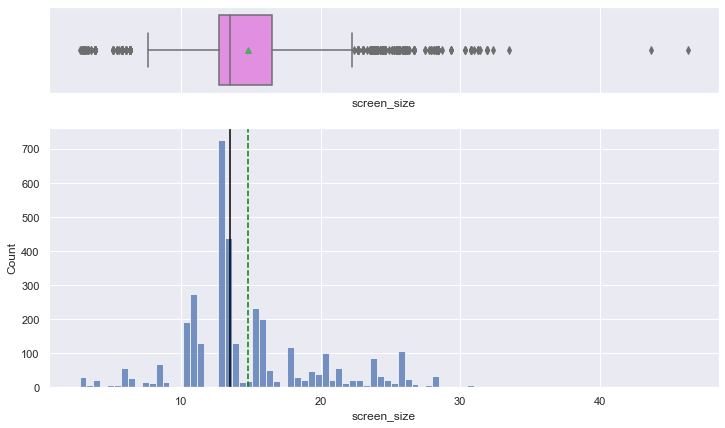

<Figure size 504x288 with 0 Axes>

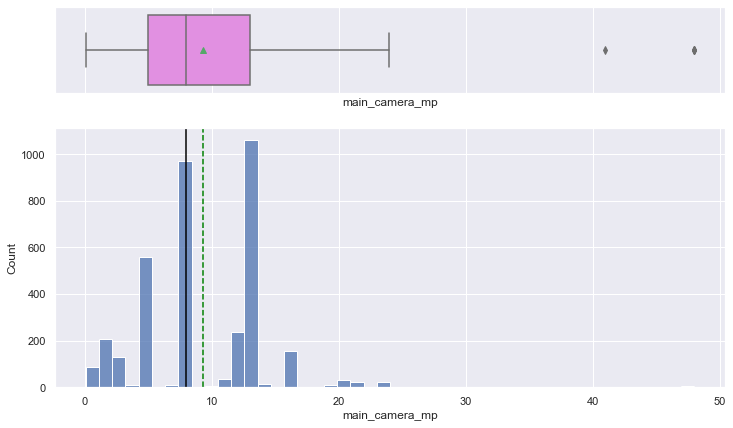

<Figure size 504x288 with 0 Axes>

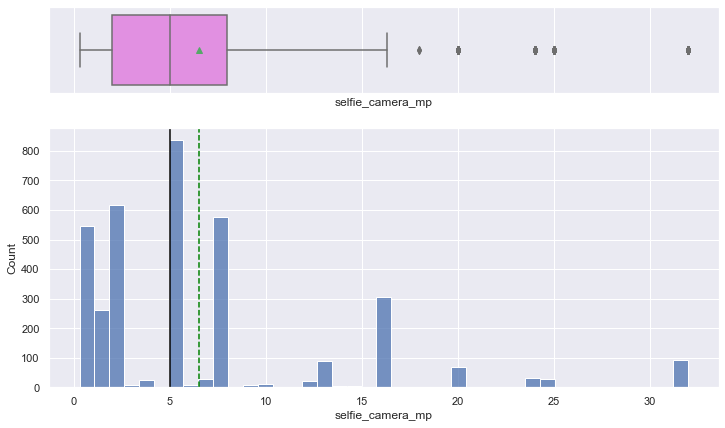

<Figure size 504x288 with 0 Axes>

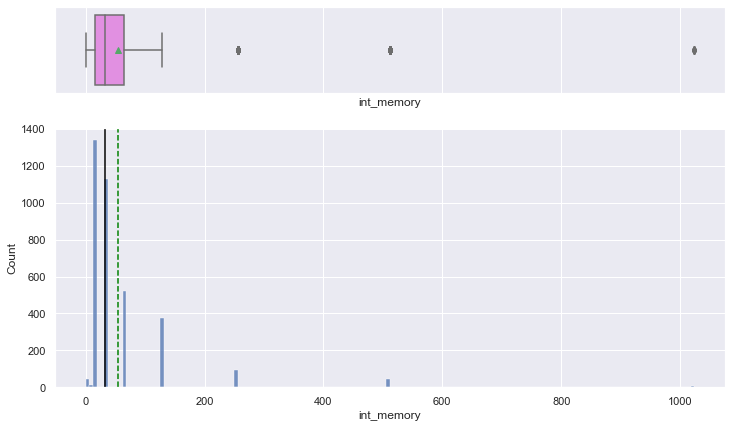

<Figure size 504x288 with 0 Axes>

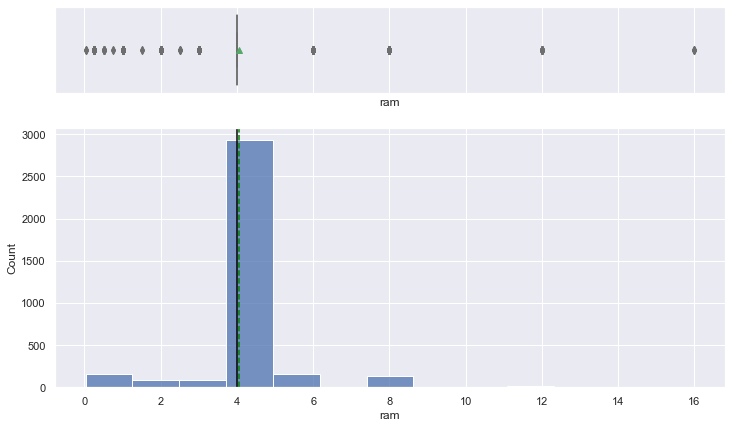

<Figure size 504x288 with 0 Axes>

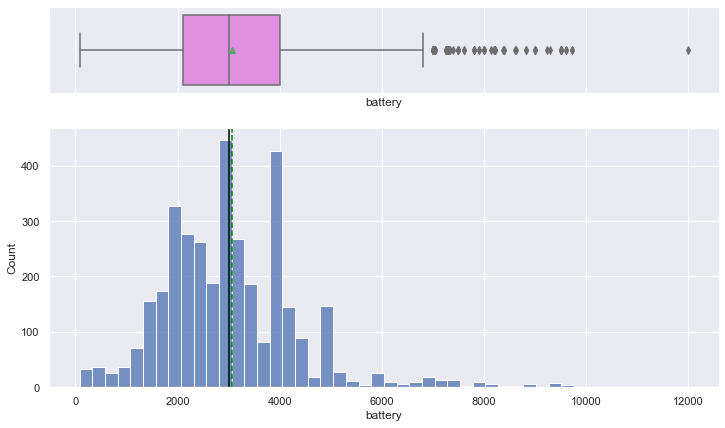

<Figure size 504x288 with 0 Axes>

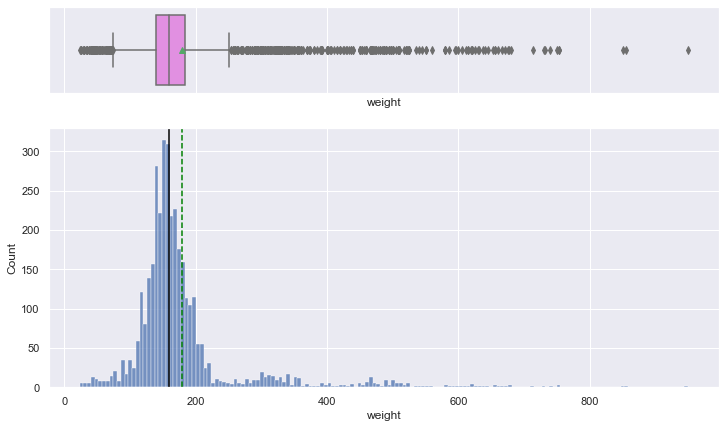

<Figure size 504x288 with 0 Axes>

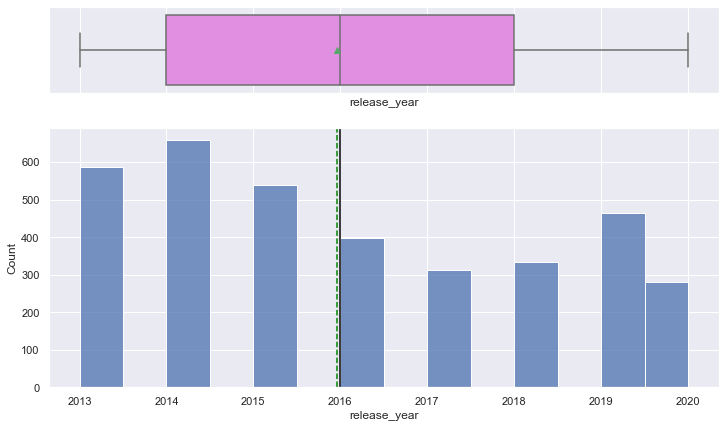

<Figure size 504x288 with 0 Axes>

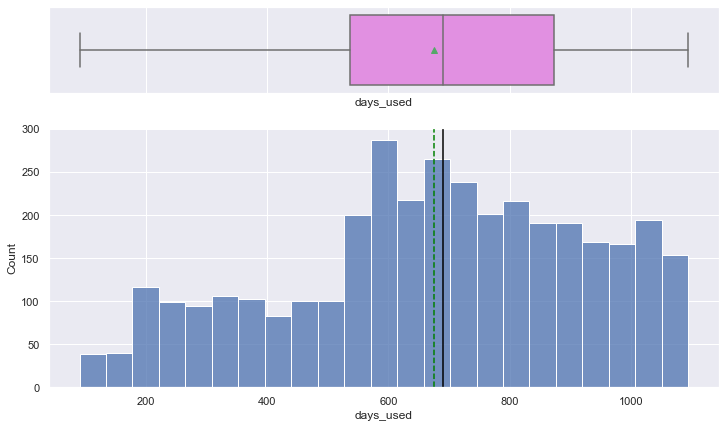

<Figure size 504x288 with 0 Axes>

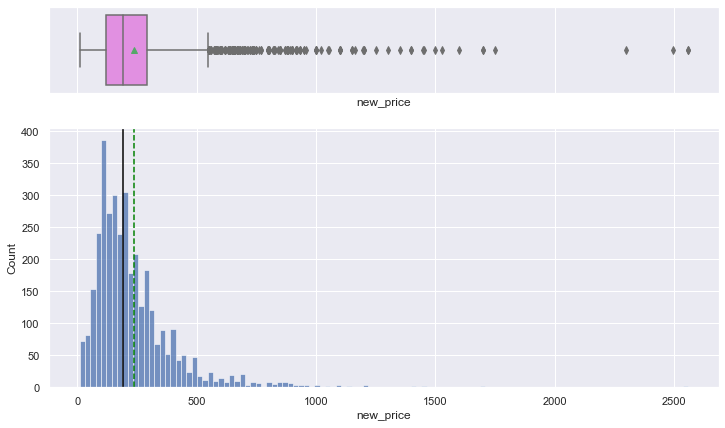

<Figure size 504x288 with 0 Axes>

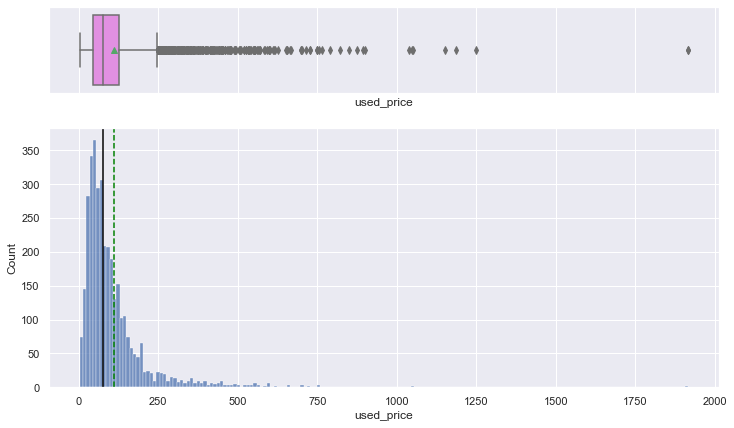

<IPython.core.display.Javascript object>

In [52]:
for column in df.columns[df.dtypes != "category"]:
    plt.figure(figsize=(7, 4))
    histogram_boxplot(df, column)
    plt.show()

In [53]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

<Figure size 504x288 with 0 Axes>

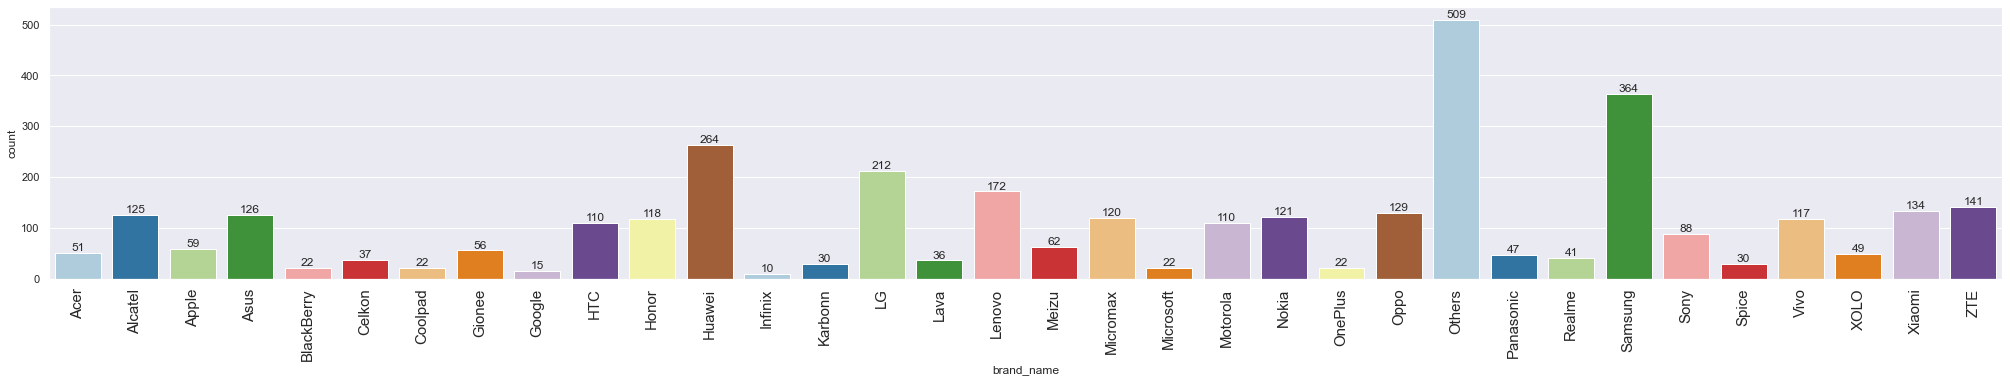

<Figure size 504x288 with 0 Axes>

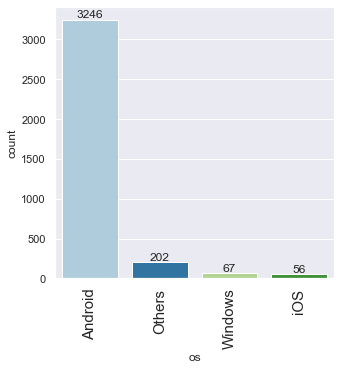

<Figure size 504x288 with 0 Axes>

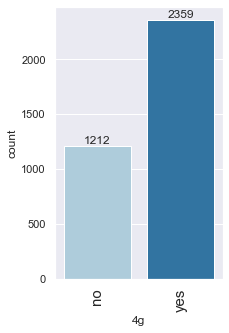

<Figure size 504x288 with 0 Axes>

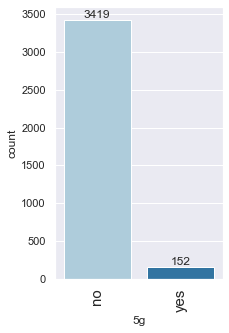

<IPython.core.display.Javascript object>

In [54]:
for column in df.columns[df.dtypes == "category"]:
    plt.figure(figsize=(7, 4))
    labeled_barplot(df, column)
    plt.show()

### Observations

* Highest screen size for used smart phone are in the range of 10.16 to 13.49 cms
* There are outliers in the screen size. 
* Used phones with screen size 13.49 cms has the highest count. 
* There are outliers exists with the battery
* Maxmimum used phones have a battery capicity ranged between 2000-4000 mAh.
* There is no skewness in battery.
* Used phones weight also has a lot of outliers but the average weight is 179 grams. 
* Used phones used_price has many outliers and it is right skewed. 
* Used phones new_price has many outlier and it is also right skewed. 
* Days used for used phones is left skewed.
* New price for used phones is also rightly skewed. 
* Used price is also rightly skewed
* Huawei, LG Samsung and Others are the highest available brands of cell phones.
* Used phones are most popular with android OS. 
* Used phones mostly available in 4G spectrum. 
* Used phones with 5G availability is very less. 


## Bivariate Analysis

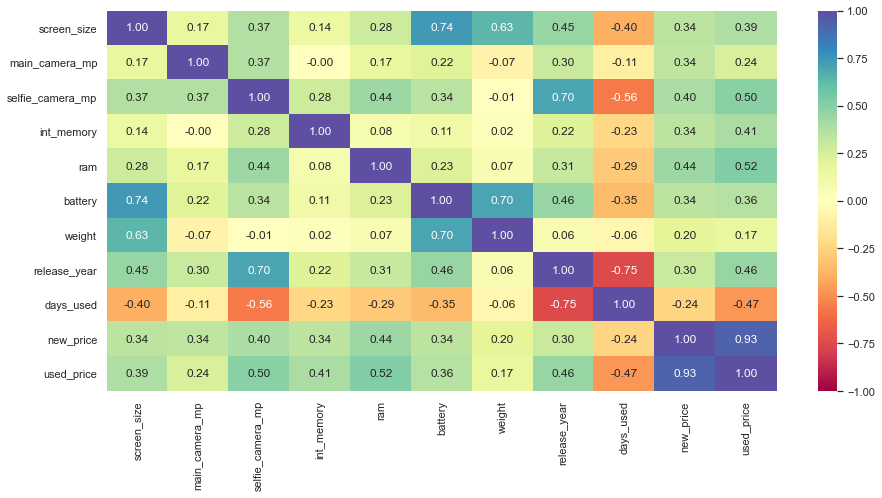

<IPython.core.display.Javascript object>

In [55]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
)
plt.show()

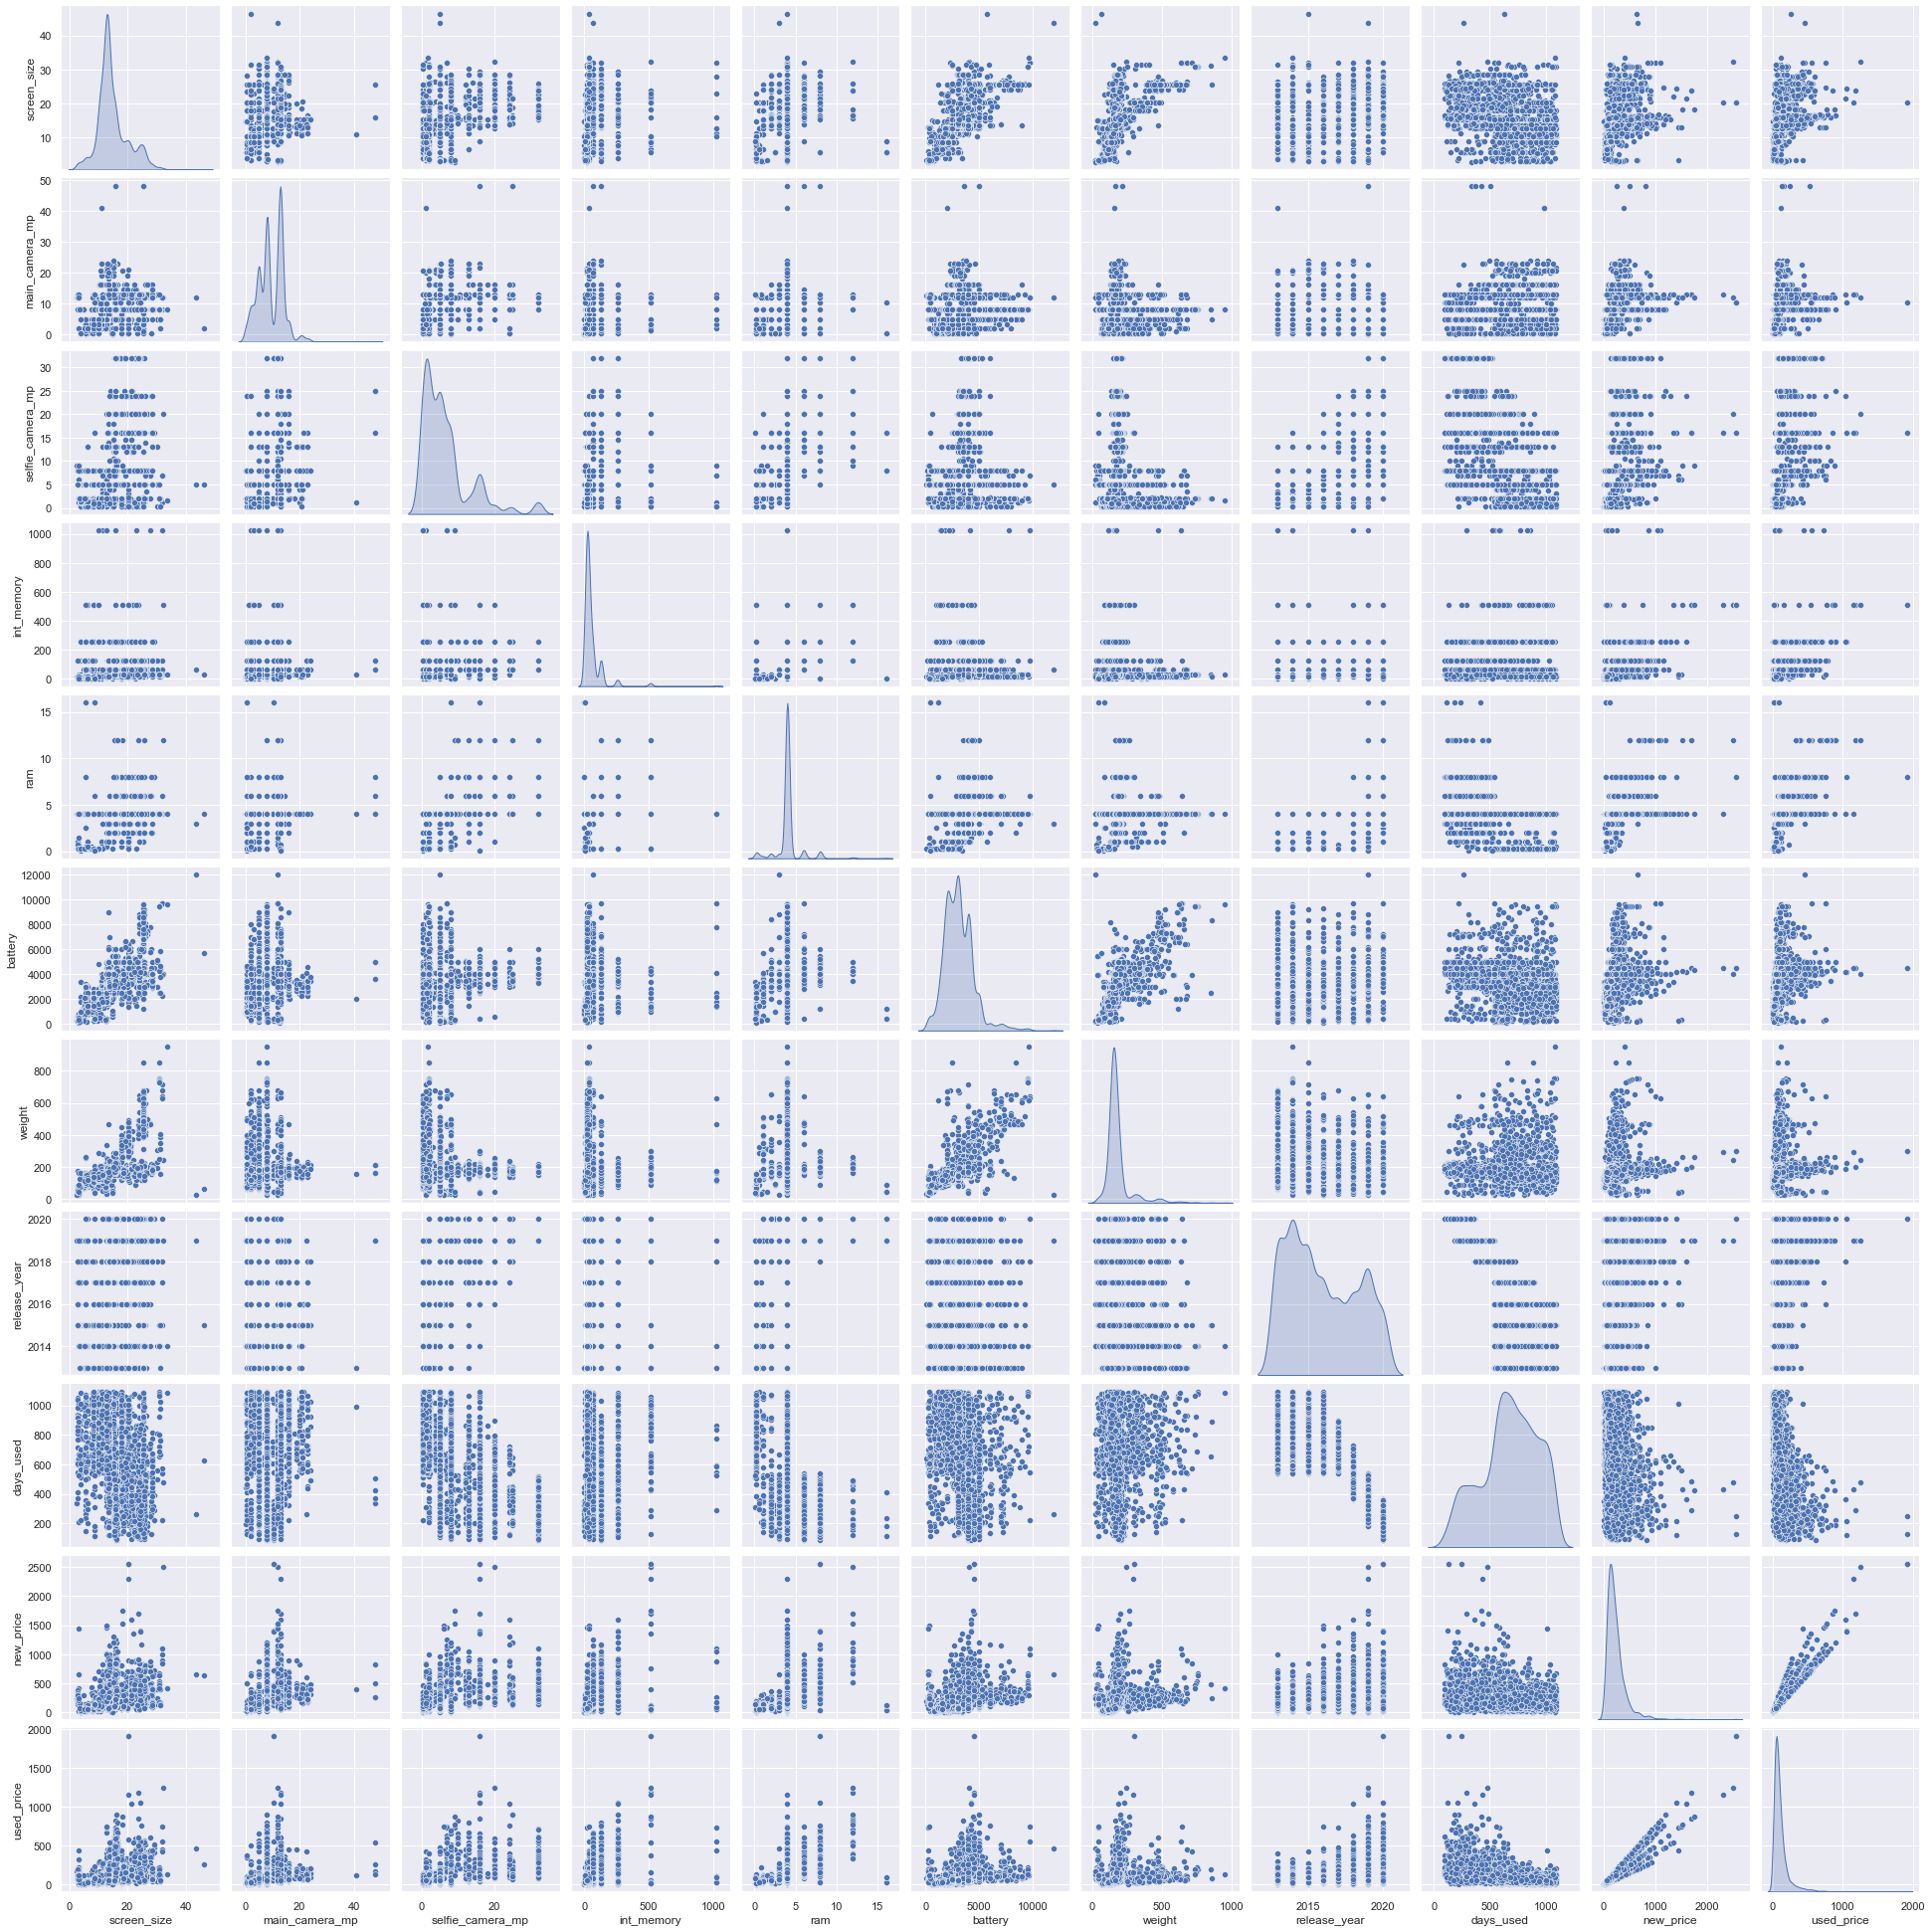

<IPython.core.display.Javascript object>

In [56]:
sns.pairplot(
    df, diag_kind="kde"
)  # to plot density curve instead of histogram on the diag
plt.show()


### Observation : 
* Screen Size with battery are positively corelated.
* New price is highly positively corelated with used price. 

### OutLier detectation and treatment


- Let's look at outliers in every numerical column

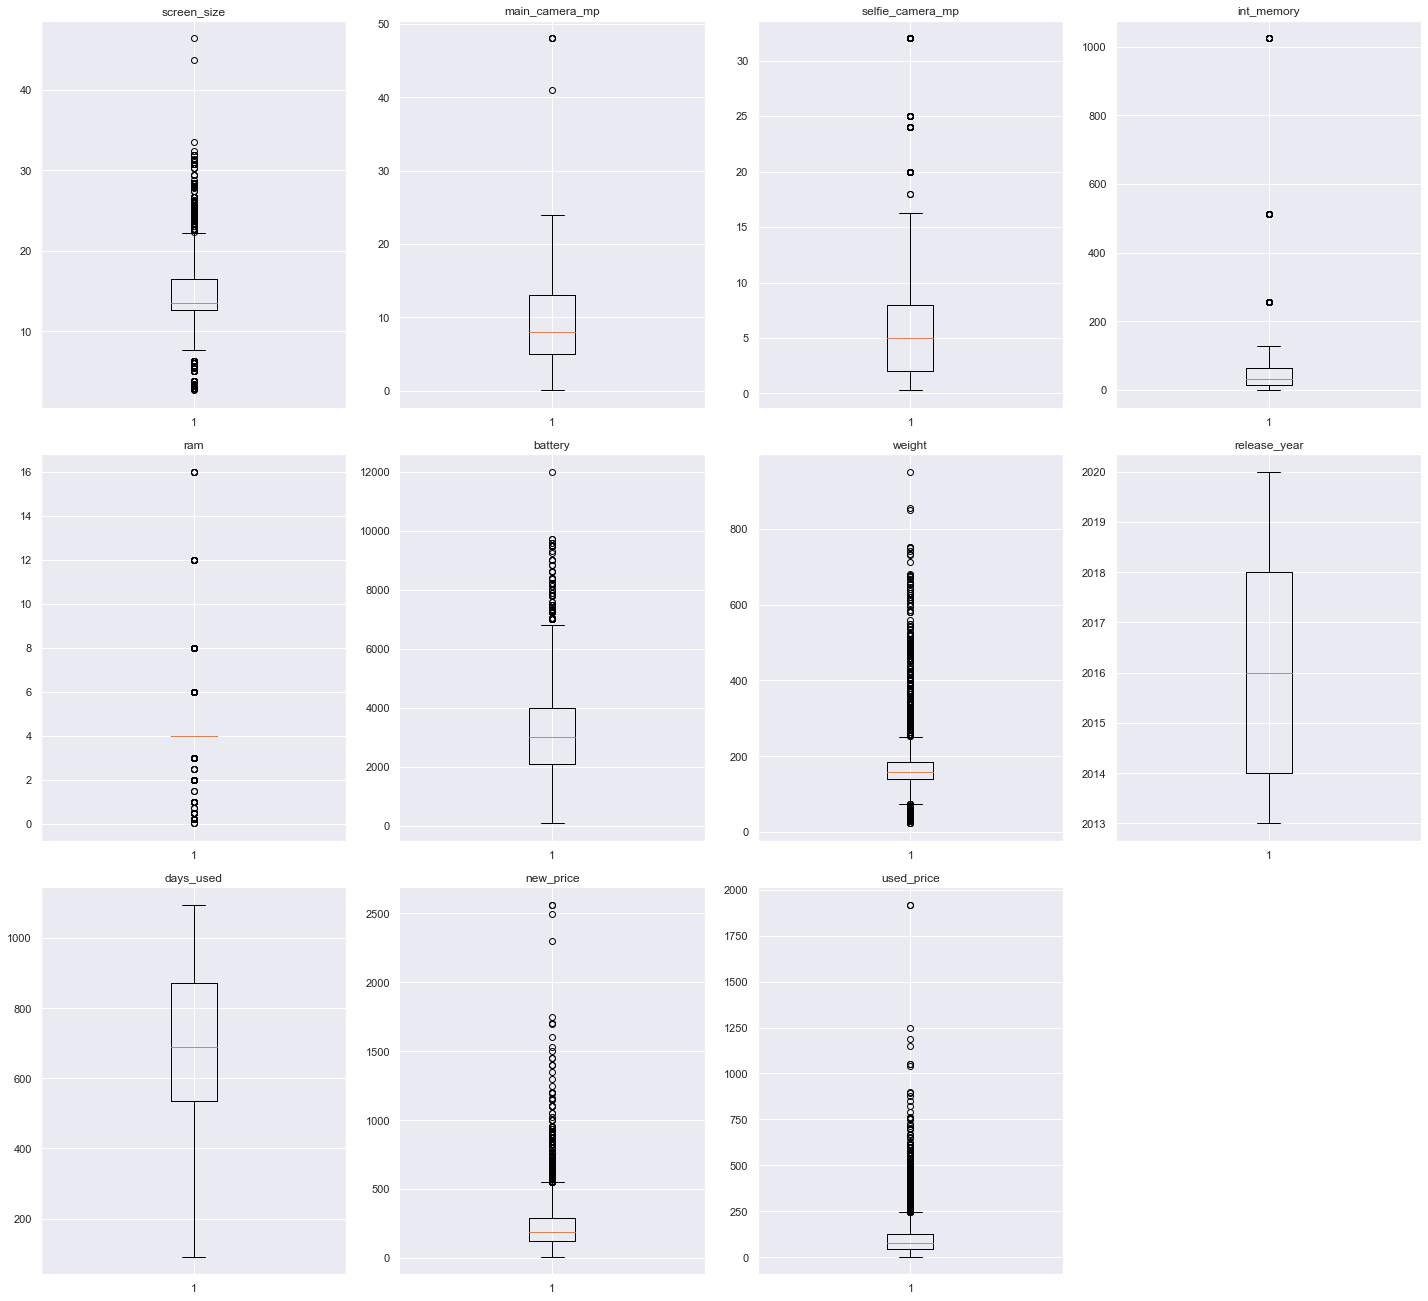

<IPython.core.display.Javascript object>

In [57]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Binning of RAM data



In [58]:
# can add custom labels
df['binned_ram'] = pd.cut(
    df['ram'], [-np.inf,3.0,4.0,np.inf], 
    labels = ["0 to 3.0", "3.0 to 4.0", "over 4.0"]
)

df.drop(['ram'], axis=1, inplace=True)

df['binned_ram'].value_counts(dropna=False)


3.0 to 4.0    2928
0 to 3.0       334
over 4.0       309
Name: binned_ram, dtype: int64

<IPython.core.display.Javascript object>

In [59]:
df["binned_ram"].head()

0    0 to 3.0
1    over 4.0
2    over 4.0
3    over 4.0
4    0 to 3.0
Name: binned_ram, dtype: category
Categories (3, object): ['0 to 3.0' < '3.0 to 4.0' < 'over 4.0']

<IPython.core.display.Javascript object>

In [60]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [61]:
# treating the outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

<IPython.core.display.Javascript object>

In [62]:
df.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'battery', 'weight', 'release_year',
       'days_used', 'new_price', 'used_price', 'binned_ram'],
      dtype='object')

<IPython.core.display.Javascript object>

In [63]:
numerical_col

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'new_price',
 'used_price']

<IPython.core.display.Javascript object>

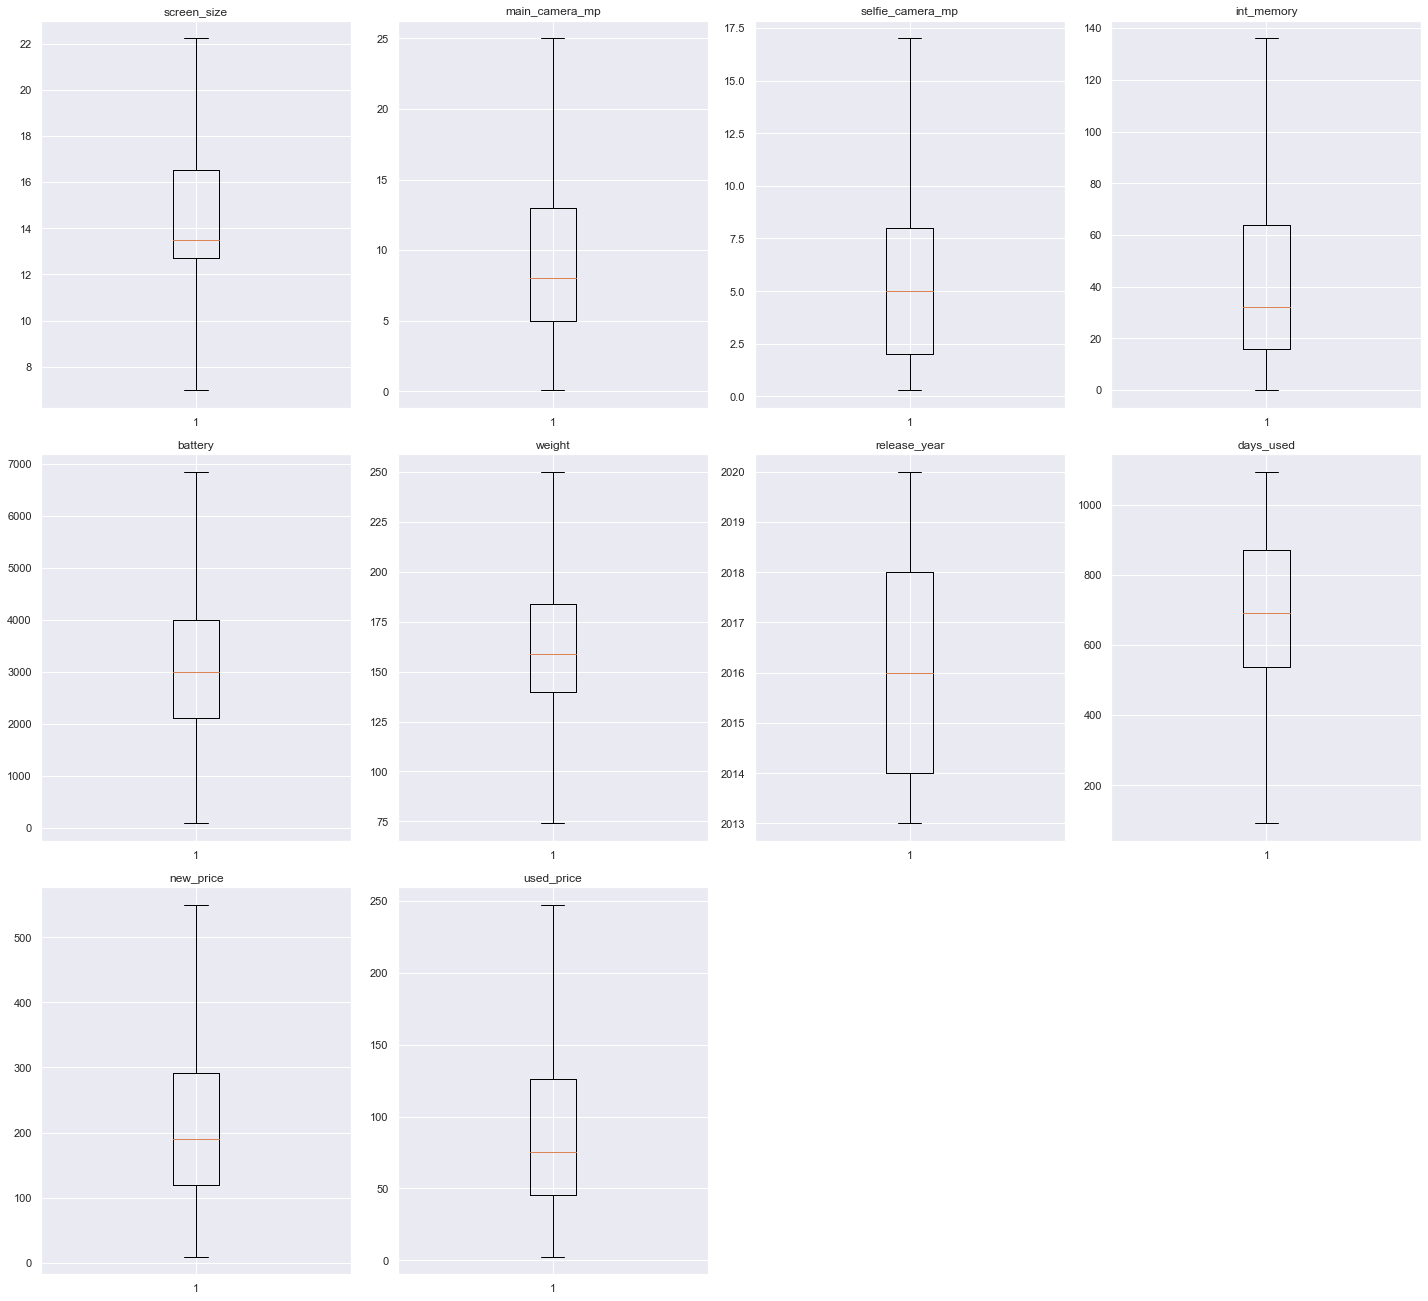

<IPython.core.display.Javascript object>

In [64]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Model building - Linear Regression

1. We want to predict the used_price for used phone .

2. Before we proceed to build a model, we'll have to encode categorical features.

3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.

4. We will build a Linear Regression model using the train data and then check it's performance.

In [65]:
# Encoding categorical features using one hot encoding. 
df = pd.get_dummies(df, columns=['brand_name','os','4g','5g','binned_ram'], drop_first=True)
df.head()


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,release_year,days_used,new_price,used_price,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes,binned_ram_3.0 to 4.0,binned_ram_over 4.0
0,22.225,13.0,5.0,64.0,3020.0,146.0,2020,127,111.62,86.9600,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,22.225,13.0,16.0,128.0,4300.0,213.0,2020,325,249.39,161.4900,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,22.225,13.0,8.0,128.0,4200.0,213.0,2020,162,359.47,247.1925,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
3,22.225,13.0,8.0,64.0,6850.0,250.0,2020,345,278.93,180.2300,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
4,15.720,13.0,8.0,64.0,5000.0,185.0,2020,293,140.87,103.8000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


<IPython.core.display.Javascript object>

In [66]:
# defining X and y variables
X = df.drop(["used_price"], axis=1)
y = df["used_price"]

print(X.head())
print(y.head())

   screen_size  main_camera_mp  selfie_camera_mp  int_memory  battery  weight  \
0       22.225            13.0               5.0        64.0   3020.0   146.0   
1       22.225            13.0              16.0       128.0   4300.0   213.0   
2       22.225            13.0               8.0       128.0   4200.0   213.0   
3       22.225            13.0               8.0        64.0   6850.0   250.0   
4       15.720            13.0               8.0        64.0   5000.0   185.0   

   release_year  days_used  new_price  brand_name_Alcatel  brand_name_Apple  \
0          2020        127     111.62                   0                 0   
1          2020        325     249.39                   0                 0   
2          2020        162     359.47                   0                 0   
3          2020        345     278.93                   0                 0   
4          2020        293     140.87                   0                 0   

   brand_name_Asus  brand_name_BlackBe

<IPython.core.display.Javascript object>

In [67]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [68]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

print("Number of columns in train data =", x_train.shape[1])
print("Number of columns in test data =", x_test.shape[1])

Number of rows in train data = 2499
Number of rows in test data = 1072
Number of columns in train data = 49
Number of columns in test data = 49


<IPython.core.display.Javascript object>

In [69]:
linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

### Let's check the coefficients and intercept of the model.

In [70]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
screen_size,0.414290
main_camera_mp,-0.388092
selfie_camera_mp,0.644968
int_memory,0.098394
battery,-0.000095
weight,-0.015329
release_year,-0.063821
days_used,-0.084035
new_price,0.376474
brand_name_Alcatel,2.461901


<IPython.core.display.Javascript object>

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [71]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [72]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.488532,9.963941,0.958402,0.957569,17.408525


<IPython.core.display.Javascript object>

In [73]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,14.481665,10.417517,0.95206,0.949762,18.124506


<IPython.core.display.Javascript object>

**Observations**

- The training $R^2$ is 96%, indicating that the model explains 96% of the variation in the train data. So, the model is not underfitting.

- MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

- MAE indicates that our current model is able to predict used_price within a mean error of 10.41 Euros on the test data.

- MAPE on the test set suggests we can predict within 18.1% of the used_price.

## Linear Regression using statsmodels

- Let's build a linear regression model using statsmodels.

In [74]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1152.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        02:32:35   Log-Likelihood:                -10048.
No. Observations:                2499   AIC:                         2.020e+04
Df Residuals:                    2449   BIC:                         2.049e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   183.97

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient show that *used_price* decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that *used_price* increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

- So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return round(vif)

<IPython.core.display.Javascript object>

In [76]:
checking_vif(x_train1)

,feature,VIF
0,const,4042073.0
1,screen_size,4.0
2,main_camera_mp,2.0
3,selfie_camera_mp,4.0
4,int_memory,2.0
5,battery,4.0
6,weight,3.0
7,release_year,5.0
8,days_used,3.0
9,new_price,3.0


<IPython.core.display.Javascript object>

* *brand_name_Apple*,*brand_name_Others*, *brand_name_Samsung* and *os_iOS* have VIF greater than or equal to 5.
* *brand_name_Apple* and *os_iOS* have a VIF score of much greater than 10 i.e. 23 and 22 which shows signs of high multicollinearity.
* This does seem to make intuitive sense because the Apple brand and OS IOS are highly related. 

### Treating Multicollinearity

To Treating multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [77]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [78]:
col_list = ["brand_name_Apple", "brand_name_Samsung", "brand_name_Others", "os_iOS"]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Others,0.957582,13.623546
1,brand_name_Samsung,0.957581,13.623742
2,brand_name_Apple,0.957500,13.636633
3,os_iOS,0.957383,13.655416


<IPython.core.display.Javascript object>

In [79]:
col_to_drop = "brand_name_Others"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Others


,feature,VIF
0,const,4039366.0
1,screen_size,4.0
2,main_camera_mp,2.0
3,selfie_camera_mp,4.0
4,int_memory,2.0
5,battery,4.0
6,weight,3.0
7,release_year,5.0
8,days_used,3.0
9,new_price,3.0


<IPython.core.display.Javascript object>

In [80]:
col_list = ["brand_name_Apple", "brand_name_Samsung", "os_iOS"]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Samsung,0.957581,13.623742
1,brand_name_Apple,0.957500,13.636633
2,os_iOS,0.957383,13.655416


<IPython.core.display.Javascript object>

In [81]:
col_to_drop = "brand_name_Apple"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,4030253.0
1,screen_size,4.0
2,main_camera_mp,2.0
3,selfie_camera_mp,4.0
4,int_memory,2.0
5,battery,4.0
6,weight,3.0
7,release_year,5.0
8,days_used,3.0
9,new_price,3.0


<IPython.core.display.Javascript object>

In [82]:
col_list = ["brand_name_Samsung", "os_iOS"]
res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Samsung,0.957581,13.623742
1,os_iOS,0.957383,13.655416


<IPython.core.display.Javascript object>

**The above predictors have no multicollinearity and the assumption is satisfied.**

Let's check the model performance.

In [83]:
olsmod1 = sm.OLS(y_train, x_train3).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     1198.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        02:32:40   Log-Likelihood:                -10051.
No. Observations:                2499   AIC:                         2.020e+04
Df Residuals:                    2451   BIC:                         2.048e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   239.08

<IPython.core.display.Javascript object>

**Observations**

- We can see that adj. R-squared has not dropped from 0.958, which shows that the dropped columns did not have much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.

- 'const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'days_used', 'new_price', 'brand_name_BlackBerry', 'brand_name_Gionee', 'brand_name_Google', 'brand_name_Infinix', 'brand_name_LG', 'brand_name_Nokia', 'brand_name_OnePlus', 'os_Others', 'os_iOS', '4g_yes', '5g_yes', 'binned_ram_3.0 to 4.0', 'binned_ram_over 4.0' have p-value > 0.05. So, they are not significant and we'll drop them.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [84]:
# initial list of columns
cols = x_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'days_used', 'new_price', 'brand_name_BlackBerry', 'brand_name_Gionee', 'brand_name_Google', 'brand_name_Infinix', 'brand_name_LG', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_OnePlus', 'os_Others', 'os_iOS', '4g_yes', '5g_yes', 'binned_ram_3.0 to 4.0', 'binned_ram_over 4.0']


<IPython.core.display.Javascript object>

In [85]:
x_train4 = x_train3[selected_features]
x_test4 = x_test3[selected_features]

<IPython.core.display.Javascript object>

In [86]:
olsmod2 = sm.OLS(y_train, x_train4).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     2821.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        02:32:43   Log-Likelihood:                -10062.
No. Observations:                2499   AIC:                         2.017e+04
Df Residuals:                    2478   BIC:                         2.029e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    56.15

<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train4* as the final ones and *olsmod2* as final model.**

**Observations**

* Now adjusted R-squared is 0.958, i.e., our model is able to explain ~96% of the variance. This shows that the model is good.
* The adjusted R-squared in *olsmod0* (where we considered all the variables) was 0.958. This shows that the variables we dropped were not affecting the model much.

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

###  LINEARITY AND INDEPENDENCE Test

**What is the need for the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**Check for linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [88]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head(10)

,Actual Values,Fitted Values,Residuals
1248,98.8700,108.054537,-9.184537
2206,132.6200,142.221083,-9.601083
1623,25.2700,36.271576,-11.001576
2245,104.2600,107.267973,-3.007973
1043,39.2200,52.638446,-13.418446
1459,46.8300,57.073425,-10.243425
2680,20.8700,10.750722,10.119278
3130,30.1900,40.011077,-9.821077
693,247.1925,226.273226,20.919274
2276,95.6500,97.542298,-1.892298


<IPython.core.display.Javascript object>

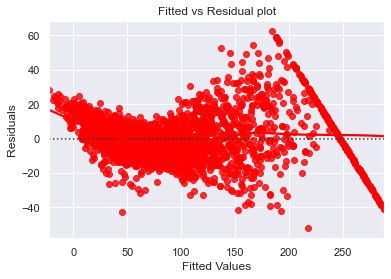

<IPython.core.display.Javascript object>

In [89]:
# let's plot the fitted values vs residuals

sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="red", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see some pattern in the plot above but only marginal. Hence, the assumptions of linearity and independence are marginally satisfied.**

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

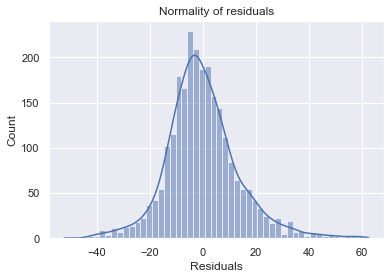

<IPython.core.display.Javascript object>

In [90]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

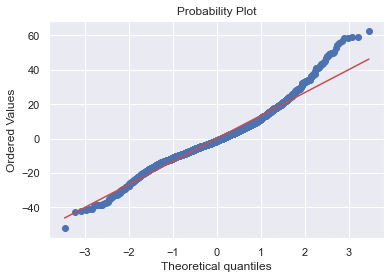

<IPython.core.display.Javascript object>

In [91]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The residuals more or less follow a straight line except for the tails.

Let's check the results of the Shapiro-Wilk test

In [92]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9679059982299805, pvalue=3.4090229588673415e-23)

<IPython.core.display.Javascript object>


Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.

Strictly speaking, the residuals are not normal.

However, as an approximation, we can accept this distribution as close to being normal.

So, the assumption is satisfied

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [93]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train4)
lzip(name, test)

[('F statistic', 0.9573902208835413), ('p-value', 0.7772432978386316)]

<IPython.core.display.Javascript object>

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

**Now that we have checked all the assumptions of linear regression and they are satisfied, we can move towards the prediction part.**

In [94]:
# predictions on the test set
pred = olsmod2.predict(x_test4)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
255,194.45,169.465964
1398,170.24,148.820796
2253,164.76,204.061745
579,39.09,44.007561
3123,45.08,38.918862
1959,51.05,57.737831
3111,40.07,35.445928
1456,54.75,52.232595
3332,95.06,102.808350
855,44.03,48.171247


<IPython.core.display.Javascript object>

- We can observe here that our model has returned reasonable prediction results, and the actual and predicted values are slightly comparable though not fully.

- We can also visualize comparison result as a bar graph.

**Note**: As the number of records is large, for representation purpose, we are taking a sample of 25 records only.

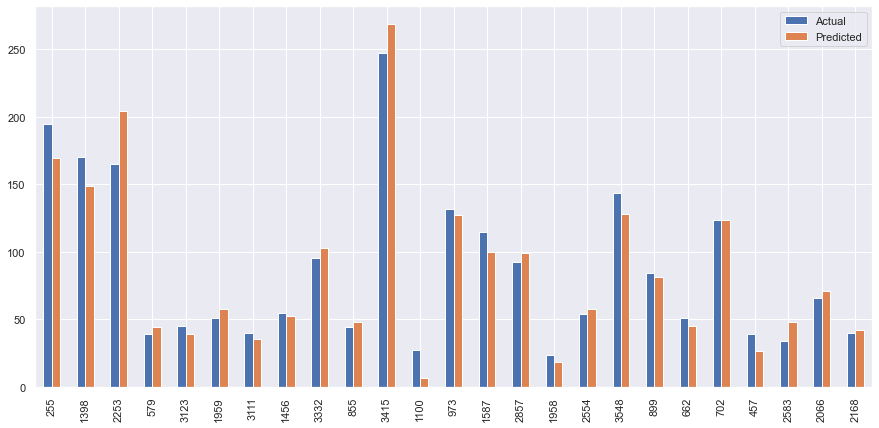

<IPython.core.display.Javascript object>

In [95]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [96]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train4, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.565729,10.013285,0.957924,0.957567,17.472534


<IPython.core.display.Javascript object>

In [97]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test4, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,14.213328,10.238658,0.95382,0.952897,17.659795


<IPython.core.display.Javascript object>

* The model is able to explain ~95.3% of the variation in the data, which is very good.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 17.4% of the used value 

* Hence, we can conclude the model *olsmod2* is reasonable for prediction as well as inference purposes.

**Let's compare the initial model created with sklearn and the final statsmodels model.**

In [98]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,13.488532,13.565729
MAE,9.963941,10.013285
R-squared,0.958402,0.957924
Adj. R-squared,0.957569,0.957567
MAPE,17.408525,17.472534


<IPython.core.display.Javascript object>

In [99]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,14.481665,14.213328
MAE,10.417517,10.238658
R-squared,0.952060,0.953820
Adj. R-squared,0.949762,0.952897
MAPE,18.124506,17.659795


<IPython.core.display.Javascript object>

* The performance of the two models is close to each other.

**Let's recreate the final statsmodels model and print it's summary to gain insights.**

In [100]:
olsmodel_final = sm.OLS(y_train, x_train4).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     2821.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        08:41:01   Log-Likelihood:                -10062.
No. Observations:                2499   AIC:                         2.017e+04
Df Residuals:                    2478   BIC:                         2.029e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    56.15

<IPython.core.display.Javascript object>

## Conclusions

1. "new_price" and "binned_ram_over 4.0", "binned_ram_3.0 to 4.0" come out to be very significant, as expected. As these increase, the total used price increases, as is visible in the positive coefficient sign.

2.  int_memory and selfie_camera_mp also out to be  significant, in valuation of used phone. As these two increase, the total used price increases, as is visible in the positive coefficient sign.

2. Brand names such as Infinix, Gionee, Lenovo, OnePlus are negatively correlated and with them, the used prices come down. On the other end,  brand_name Google, Blackberry and LG are positively impacting the Used phone pricing. 


3. Operating System os_iOS increases the Used Phone prices (Apple phones !) 
   

4. Screen Sizes tend to have positive influence on used price with increase of around (0.2432 time the screen size) as unit increase in price 

5. "4g_yes", "5g_yes" and  "main_camera_mp"  decreases used value of the phones 

